In [1]:
from IPython.display import display, HTML
display(
    HTML("""
<style>
* {font-family:D2Coding;}
div.container{width:87% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input { font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:3px;}
table.dataframe{font-size:12px;}
</style>
"""))

# <span style='color:red'>Ch7. 시계열 분석</span>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 설정
plt.rc('font', family='AppleGothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 깨짐 방지


In [3]:
df = pd.read_csv('data/일별평균대기오염도_2022(에어코리아).csv', encoding='cp949')
df.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,20220101,강남구,0.029,0.014,0.5,0.003,25.0,12.0
1,20220101,홍릉로,0.038,0.009,0.6,0.004,27.0,16.0
2,20220101,행주,0.034,0.012,0.7,0.004,27.0,16.0
3,20220101,항동,0.030,0.011,0.5,0.003,27.0,14.0
4,20220101,한강대로,0.037,0.011,0.6,0.003,34.0,14.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18250 entries, 0 to 18249
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          18250 non-null  int64  
 1   측정소명          18250 non-null  object 
 2   이산화질소농도(ppm)  18172 non-null  float64
 3   오존농도(ppm)     18176 non-null  float64
 4   일산화탄소농도(ppm)  18174 non-null  float64
 5   아황산가스농도(ppm)  18176 non-null  float64
 6   미세먼지농도(㎍/㎥)   18115 non-null  float64
 7   초미세먼지농도(㎍/㎥)  18122 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.1+ MB


In [5]:
# 측정일시가 data 자료령이 아니면, 분석이 힘듬
# df['측정일시'] : 20220101 → 2022-01-01 → datatime 형으로 전환 (df['축정일'])
# df['측정일'] = pd.to_datetime(df['측정일시'])
df['측정일'] = df['측정일시'].astype(str)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18250 entries, 0 to 18249
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          18250 non-null  int64  
 1   측정소명          18250 non-null  object 
 2   이산화질소농도(ppm)  18172 non-null  float64
 3   오존농도(ppm)     18176 non-null  float64
 4   일산화탄소농도(ppm)  18174 non-null  float64
 5   아황산가스농도(ppm)  18176 non-null  float64
 6   미세먼지농도(㎍/㎥)   18115 non-null  float64
 7   초미세먼지농도(㎍/㎥)  18122 non-null  float64
 8   측정일           18250 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 1.3+ MB


In [6]:
df['측정일'] = df['측정일'].str[:4] +"-"+ df['측정일'].str[4:6] +"-"+ df['측정일'].str[6:]

In [7]:
df[['측정일시','측정일']]

,측정일시,측정일
0,20220101,2022-01-01
1,20220101,2022-01-01
2,20220101,2022-01-01
3,20220101,2022-01-01
4,20220101,2022-01-01
...,...,...
18245,20221231,2022-12-31
18246,20221231,2022-12-31
18247,20221231,2022-12-31
18248,20221231,2022-12-31


In [8]:
df['측정일'] = pd.to_datetime(df['측정일'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18250 entries, 0 to 18249
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   측정일시          18250 non-null  int64         
 1   측정소명          18250 non-null  object        
 2   이산화질소농도(ppm)  18172 non-null  float64       
 3   오존농도(ppm)     18176 non-null  float64       
 4   일산화탄소농도(ppm)  18174 non-null  float64       
 5   아황산가스농도(ppm)  18176 non-null  float64       
 6   미세먼지농도(㎍/㎥)   18115 non-null  float64       
 7   초미세먼지농도(㎍/㎥)  18122 non-null  float64       
 8   측정일           18250 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 1.3+ MB


In [10]:
df.head(1)

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥),측정일
0,20220101,강남구,0.029,0.014,0.5,0.003,25.0,12.0,2022-01-01


In [11]:
# 현재 컬럼 목록
# index class 형을 list 형으로 변환 해야 한다.
cols = df.columns.tolist()
cols.remove('측정일')
cols

['측정일시',
 '측정소명',
 '이산화질소농도(ppm)',
 '오존농도(ppm)',
 '일산화탄소농도(ppm)',
 '아황산가스농도(ppm)',
 '미세먼지농도(㎍/㎥)',
 '초미세먼지농도(㎍/㎥)']

In [12]:
new_cols = [cols[0], '측정일'] + cols[1:]
df = df[new_cols]
df.head(1)


,측정일시,측정일,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,20220101,2022-01-01,강남구,0.029,0.014,0.5,0.003,25.0,12.0


In [13]:
print('측정소명 갯수 : ', df['측정소명'].unique().shape[0])
df['측정소명'].unique()

측정소명 갯수 :  50


array(['강남구', '홍릉로', '행주', '항동', '한강대로', '청계천로', '천호대로', '중랑구', '중구',
       '종로구', '종로', '정릉로', '자연사박물관', '은평구', '용산구', '올림픽공원', '영등포로',
       '영등포구', '양천구', '신촌로', '시흥대로', '송파구', '세곡', '성북구', '성동구', '화랑로',
       '서초구', '서울숲', '서대문구', '북한산', '마포아트센터', '마포구', '동작대로', '동작구',
       '동대문구', '도산대로', '도봉구', '노원구', '남산', '금천구', '구로구', '광진구', '관악산',
       '관악구', '공항대로', '강서구', '강북구', '강변북로', '강동구', '강남대로'], dtype=object)

In [14]:
loc_name = '공항대로'
df_fit = df[df['측정소명']==loc_name]
df_fit.head(2)


,측정일시,측정일,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
44,20220101,2022-01-01,공항대로,0.035,0.010,0.6,0.002,31.0,15.0
93,20220102,2022-01-02,공항대로,0.027,0.017,0.5,0.003,37.0,22.0


In [15]:
print(f'{loc_name} 데이터(df_fit) 갯수 : ', len(df_fit))
print(df_fit.info())

공항대로 데이터(df_fit) 갯수 :  365
<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 44 to 18249
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   측정일시          365 non-null    int64         
 1   측정일           365 non-null    datetime64[ns]
 2   측정소명          365 non-null    object        
 3   이산화질소농도(ppm)  365 non-null    float64       
 4   오존농도(ppm)     365 non-null    float64       
 5   일산화탄소농도(ppm)  365 non-null    float64       
 6   아황산가스농도(ppm)  365 non-null    float64       
 7   미세먼지농도(㎍/㎥)   365 non-null    float64       
 8   초미세먼지농도(㎍/㎥)  365 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 28.5+ KB
None


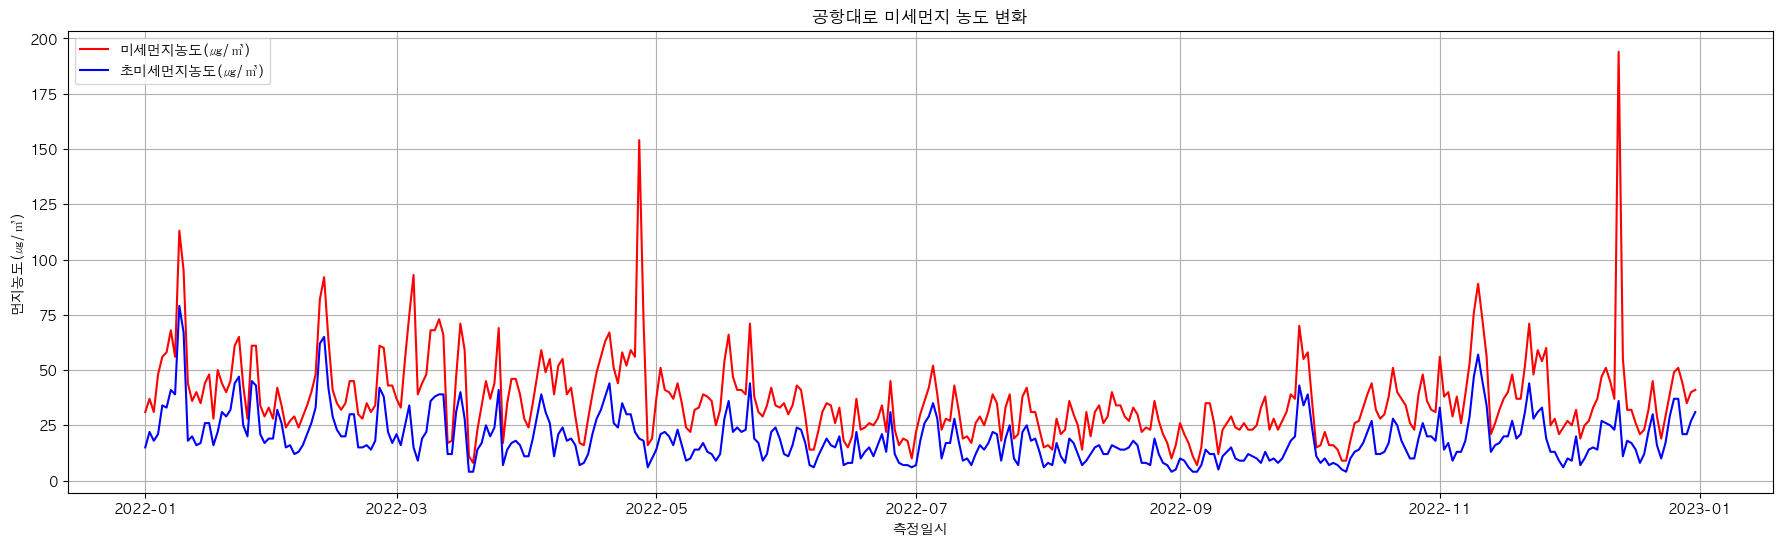

In [16]:
plt.figure(figsize=(22, 6))

plt.plot(df_fit['측정일'], df_fit['미세먼지농도(㎍/㎥)'], 'r-', label='미세먼지농도(㎍/㎥)')
plt.plot(df_fit['측정일'], df_fit['초미세먼지농도(㎍/㎥)'], 'b-', label='초미세먼지농도(㎍/㎥)')

plt.xlabel('측정일시')
plt.ylabel('먼지농도(㎍/㎥)')
plt.title(f'{loc_name} 미세먼지 농도 변화')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [17]:
df_fit2 = df_fit[['측정일','미세먼지농도(㎍/㎥)']]
# index 컬럼 설정
ts = df_fit2.set_index('측정일')
ts.head()

,미세먼지농도(㎍/㎥)
측정일,
2022-01-01,31.0
2022-01-02,37.0
2022-01-03,31.0
2022-01-04,48.0
2022-01-05,56.0


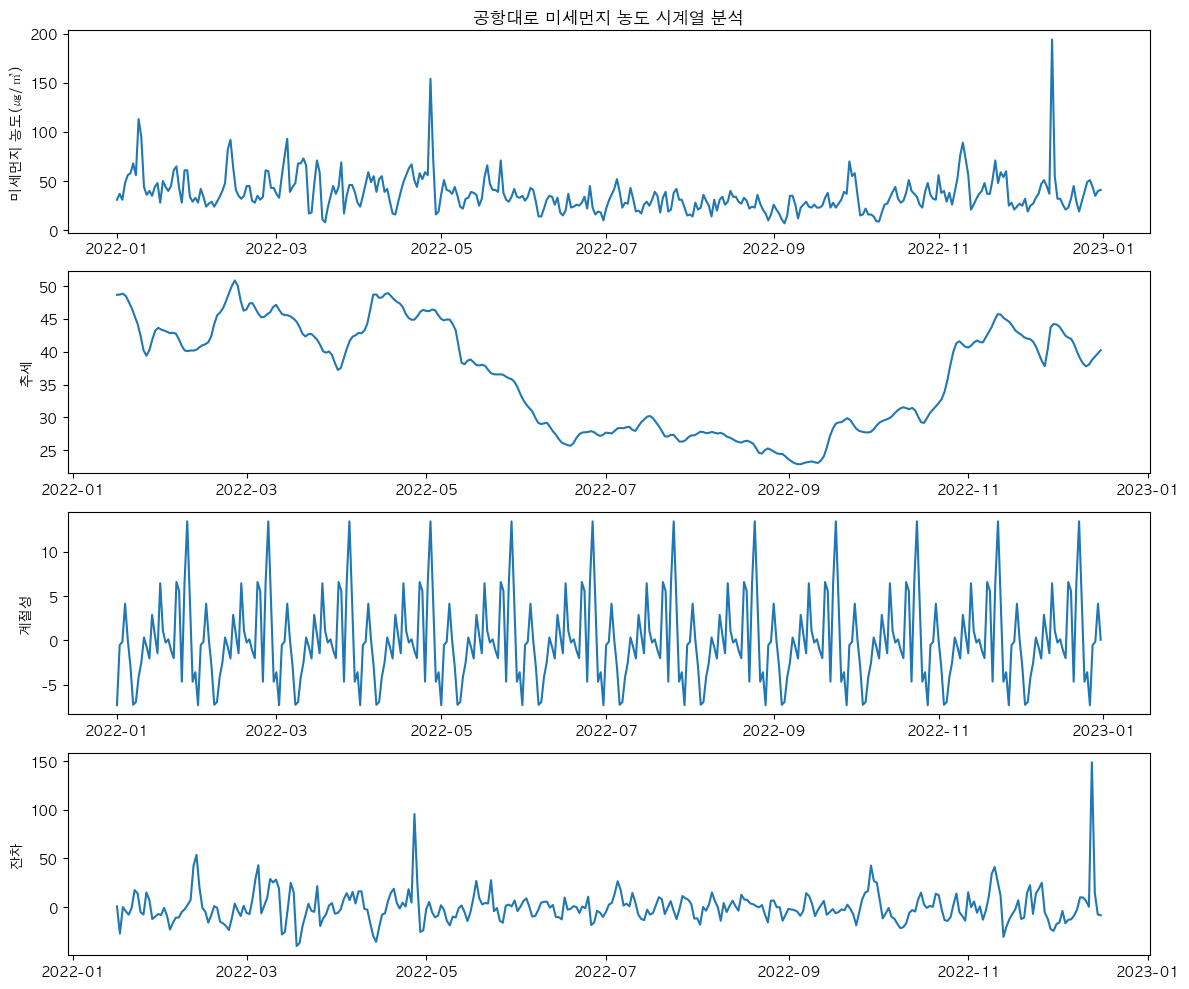

In [18]:
# 시계열 데이터의 구조를 분해해 주는 도구
# - 추세
from statsmodels.tsa.seasonal import seasonal_decompose

# 데이터 분해
# result = seasonal_decompose(ts['미세먼지농도(㎍/㎥)'], model='multiplicative')
result = seasonal_decompose(ts['미세먼지농도(㎍/㎥)'],                  
                             model='additive', # 실제값 추세, 계절성, 잔차를 덧셈으로 분석
                             period=30, # 한달 단위로 계절성을 분석해봐
                             )
# result : 분석 결과
# result.observed : 실제값 데이터
# result.trend : 데이터의 장기적인 변화, 전반적으로 감소, 증가 (추세)
# resut.seasonal : 주기적인 계절성 패턴
# result.resid : 잔차 (실제값에서 추세나 계절성을 뺀 노이즈)

fig, axes = plt.subplots(4, 1, figsize=(12, 10))

axes[0].plot(result.observed)
axes[1].plot(result.trend)
axes[2].plot(result.seasonal)
axes[3].plot(result.resid)

axes[0].set_title(f'{loc_name} 미세먼지 농도 시계열 분석')
axes[0].set_ylabel('미세먼지 농도(㎍/㎥)')
axes[1].set_ylabel('추세')
axes[2].set_ylabel('계절성')
axes[3].set_ylabel('잔차')

plt.tight_layout()
plt.show()

In [19]:
def plot_seasonal_decompose(result):
    fig, axes = plt.subplots(4, 1, figsize=(12, 10))

    result.observed.plot(ax=axes[0])
    result.trend.plot(ax=axes[1])
    result.seasonal.plot(ax=axes[2])
    result.resid.plot(ax=axes[3])


    axes[0].set_title(f'{loc_name} 미세먼지 농도 시계열 분석')
    axes[0].set_ylabel('관측값')
    axes[1].set_ylabel('추세')
    axes[2].set_ylabel('계절성')
    axes[3].set_ylabel('잔차')
    plt.xlabel('날짜')
    plt.tight_layout()
    plt.show()    




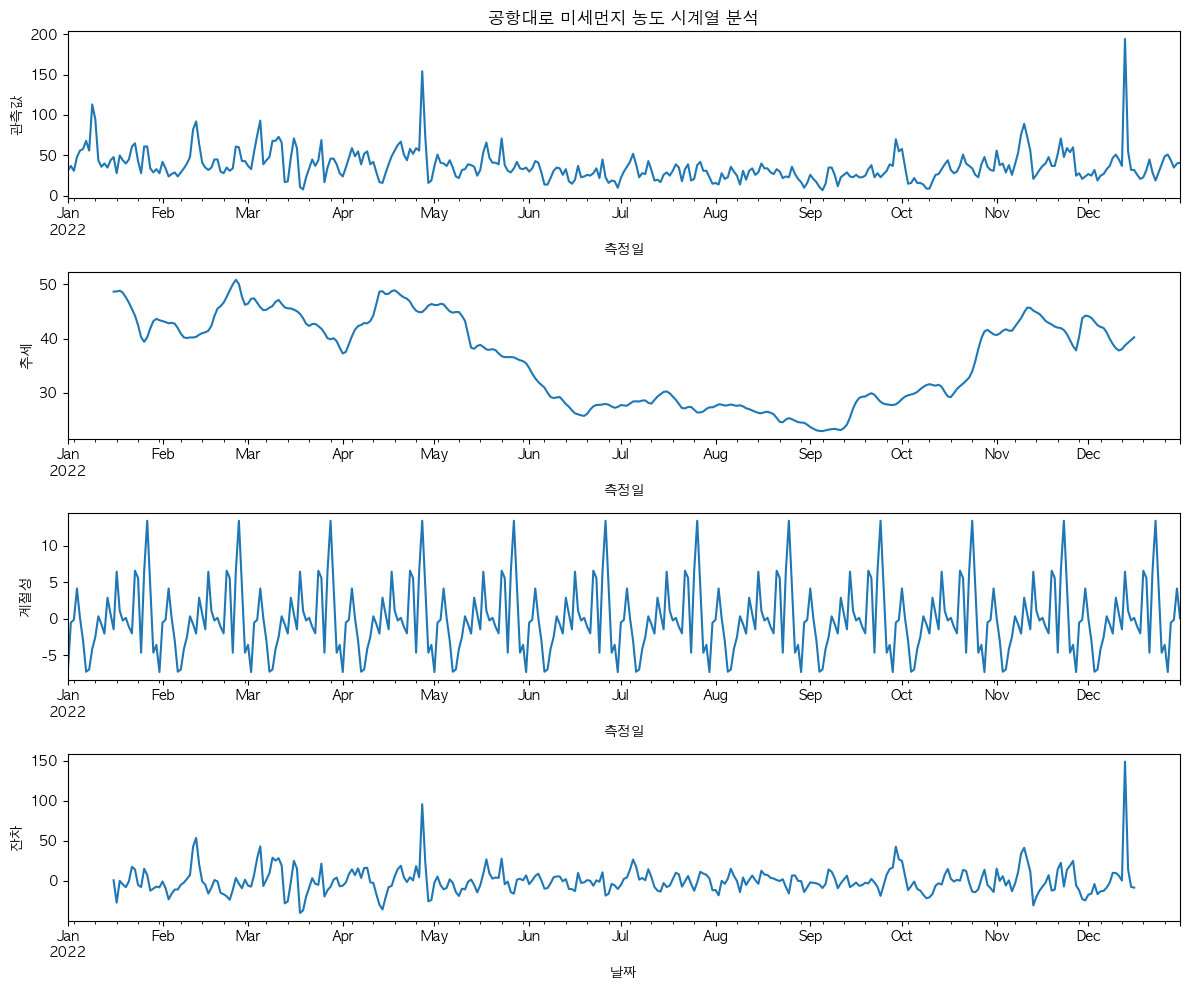

In [20]:
plot_seasonal_decompose(result)

## seasonal_decompose & RNN / LSTM / GRU & Prophet


<table>
<tr>
<td>seasonal_decompose & RNN</td>
<td>RNN / LSTM / GRU</td>
<td>Prophet</td>
</tr>
<tr>
<tr>
<td>통계적 분석</td>
<td>예측</td>
<td>예측</td>
</tr>
</tr>




## Prophet

- 계절성, 추세, 휴일효과등을 자동으로 모델링
- pip install prophet


In [21]:
df_fit2.head()

,측정일,미세먼지농도(㎍/㎥)
44,2022-01-01,31.0
93,2022-01-02,37.0
143,2022-01-03,31.0
196,2022-01-04,48.0
244,2022-01-05,56.0


In [22]:
df_fit2.columns = ['ds', 'y'] # prophet의 fit시 컬럼명을 ds, y
df_fit2

,ds,y
44,2022-01-01,31.0
93,2022-01-02,37.0
143,2022-01-03,31.0
196,2022-01-04,48.0
244,2022-01-05,56.0
...,...,...
18043,2022-12-27,51.0
18095,2022-12-28,44.0
18143,2022-12-29,35.0
18193,2022-12-30,40.0


In [23]:
from prophet import Prophet

p_model = Prophet()
p_model.fit(df_fit2)

Importing plotly failed. Interactive plots will not work.
17:14:42 - cmdstanpy - INFO - Chain [1] start processing
17:14:42 - cmdstanpy - INFO - Chain [1] done processing


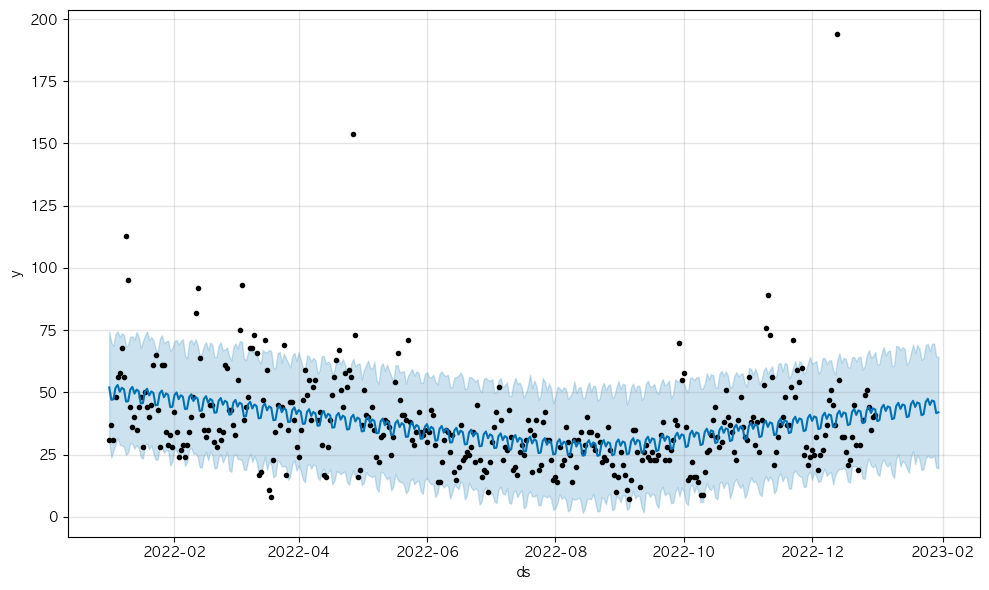

In [24]:
# p_model을 이용하여, 30일 이후의 데이터를 예측
future = p_model.make_future_dataframe(periods=30)

forecast = p_model.predict(future)
f = p_model.plot(forecast)


In [25]:
# 뒤에 있는 30일이 예측값 tail(30)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'weekly']].tail(30)

,ds,yhat,yhat_lower,yhat_upper,weekly
365,2023-01-01,38.460436,17.295892,61.100211,-3.623908
366,2023-01-02,38.832071,16.487390,61.448059,-3.366739
367,2023-01-03,43.732361,21.493383,65.594108,1.419085
368,2023-01-04,45.047319,23.133046,68.267029,2.619577
369,2023-01-05,42.563411,20.987794,64.840957,0.021202
370,2023-01-06,44.378038,20.246669,66.502058,1.721364
371,2023-01-07,43.980560,21.817506,66.894376,1.209419
372,2023-01-08,39.261699,17.167172,60.408182,-3.623908
373,2023-01-09,39.633335,15.591832,60.780083,-3.366739
374,2023-01-10,44.533625,23.492474,68.700175,1.419085


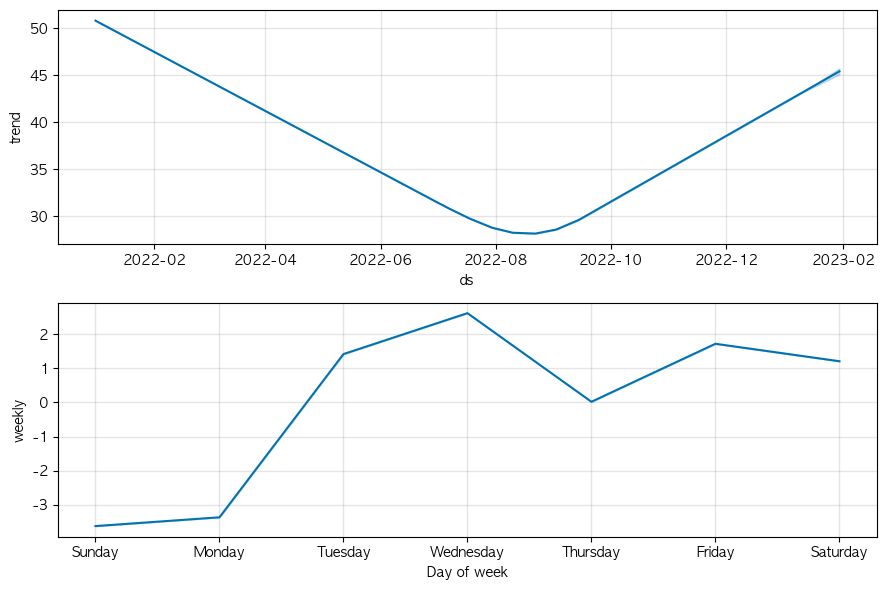

In [26]:
f2 = p_model.plot_components(forecast) # 트랜드와 휴일효과 그래프

In [30]:
forecast[forecast['ds'] == '2023-01-16']

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
380,2023-01-16,43.801338,17.728265,62.458825,43.691775,43.912579,-3.366739,-3.366739,-3.366739,-3.366739,-3.366739,-3.366739,0.0,0.0,0.0,40.434599


In [35]:
forecast.loc[forecast['ds'] == '2023-01-16', ['yhat','yhat_lower','yhat_upper']]

,yhat,yhat_lower,yhat_upper
380,40.434599,17.728265,62.458825
